In [28]:
import pandas as pd
import missingno as msno
from datetime import date, time, datetime,timedelta
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_pickle('weatherdata_raw')

In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51142 entries, 0 to 51141
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_now            51142 non-null  datetime64[ns]
 1   temp_now            51128 non-null  float64       
 2   rhum_now            51128 non-null  float64       
 3   dwpt_now            51128 non-null  float64       
 4   pres_now            51128 non-null  float64       
 5   temp_diff           51121 non-null  float64       
 6   rhum_diff           51121 non-null  float64       
 7   dwpt_diff           51121 non-null  float64       
 8   pres_diff           51121 non-null  float64       
 9   tsun_now            48253 non-null  float64       
 10  prcp_now            51047 non-null  float64       
 11  snow_now            51142 non-null  float64       
 12  coco_now            41541 non-null  float64       
 13  tsun_now_next_hour  48254 non-null  float64   

<AxesSubplot:>

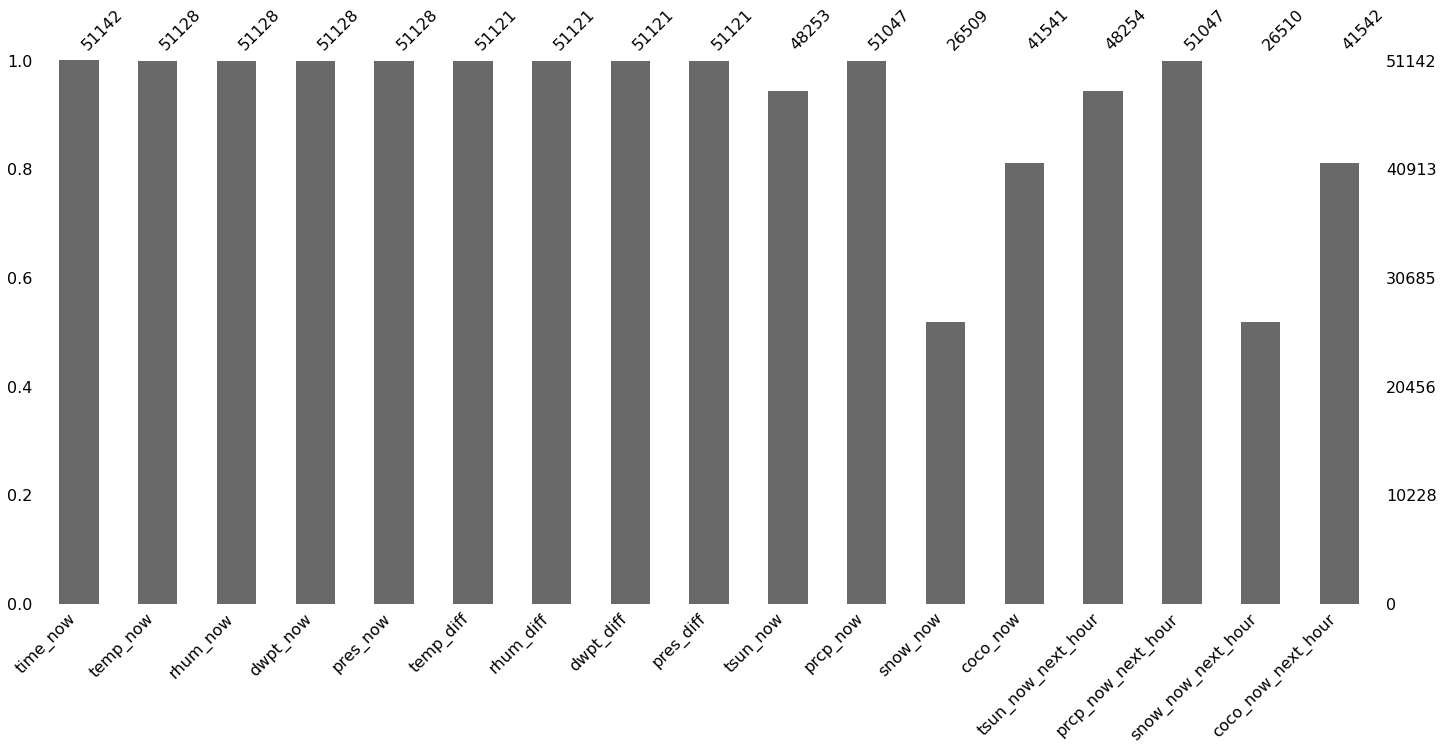

In [3]:
msno.bar(df_weather)

In [4]:
#assuming no reported snow means no snow
df_weather.snow_now = df_weather.snow_now.fillna(0)
df_weather.snow_now_next_hour = df_weather.snow_now_next_hour.fillna(0)

In [12]:
df_weather['date_now'] = df_weather.time_now.dt.date

In [21]:
df1 = df_weather[df_weather.coco_now.isnull()].sort_values('time_now').groupby('date_now').count().reset_index()

In [22]:
px.bar(df1,'date_now','time_now')
#based on this observation we should only consider records made after 2018

In [24]:
df_weather = df_weather[df_weather.date_now>date(2018,11,1)]

<AxesSubplot:>

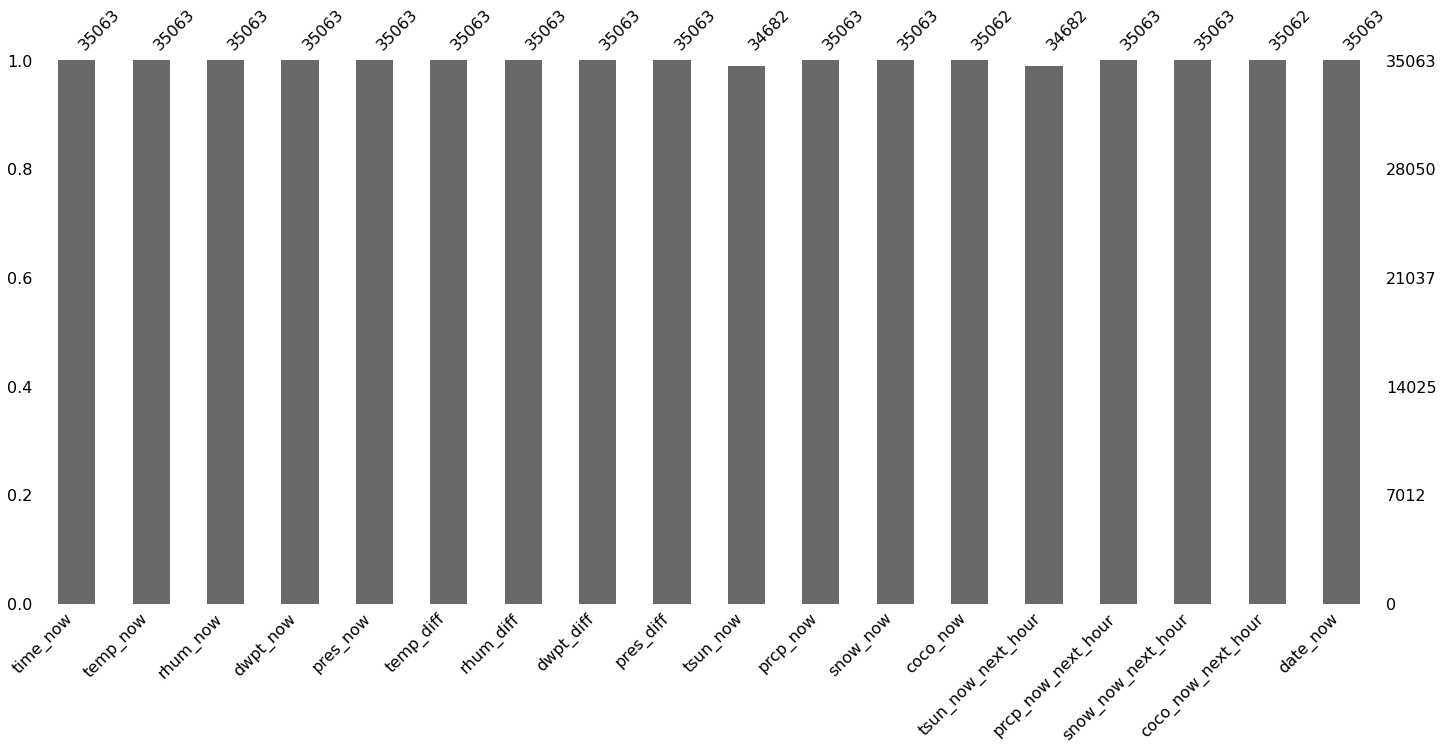

In [25]:
msno.bar(df_weather)

In [34]:
#extracting feature month
df_weather['month'] = pd.DatetimeIndex(df_weather.date_now).month

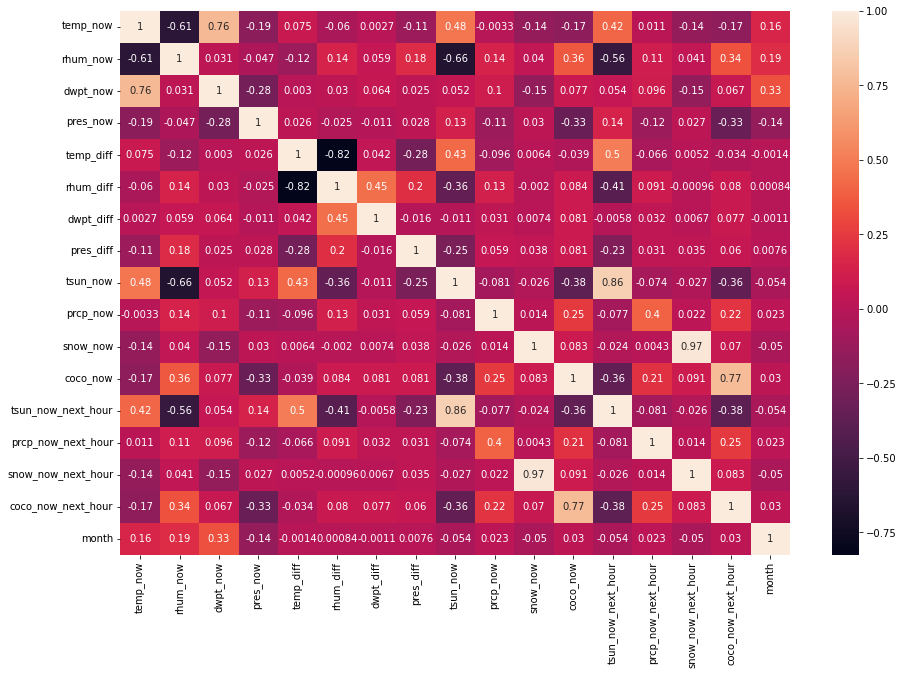

In [35]:
fig, ax = plt.subplots(1, figsize=(15, 10))
corr_matrix = df_weather.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [36]:
df_weather.to_pickle('weatherdata')